In [1]:
import torch
from scipy.linalg import hadamard
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm

d = torch.tensor(128) # dimension of the vector

In [2]:
def rotate(x):
    # normalized Hadamard matrix
    H = (hadamard(d)/torch.sqrt(d)).type(torch.float32)
    # random diagonal matrix
    diag = torch.diag(torch.where(torch.rand(d)>0.5, 1, -1)).type(torch.float32)
    # rotation matrix
    R = torch.mm(H, diag)
    # rotating
    return torch.matmul(R, x)

## Uniform distribution

In [3]:
x = torch.rand(d)

In [4]:
out = []

for _ in tqdm(range(int(1e4))): # for 10,000 iterations:
    out.append(rotate(x)[57].item())

100%|███████████████████████████████████████████████████████| 10000/10000 [00:23<00:00, 417.94it/s]


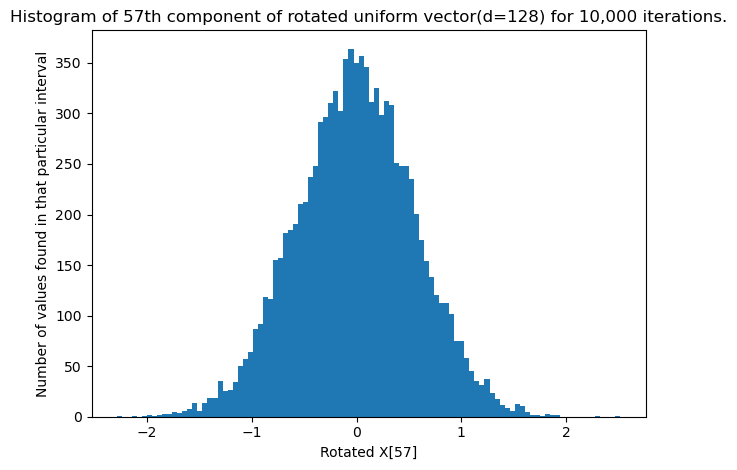

In [5]:
plt.hist(out, bins=100)
plt.title("Histogram of 57th component of rotated uniform vector(d=128) for 10,000 iterations.")
plt.xlabel("Rotated X[57]")
plt.ylabel("Number of values found in that particular interval")
plt.tight_layout()
plt.show()

## Poisson distribution

In [6]:
x_poisson = torch.poisson(torch.rand(d))

In [7]:
out_poisson = []

for _ in tqdm(range(int(1e4))): # for 10,000 iterations
    out_poisson.append(rotate(x_poisson)[57].item())

100%|███████████████████████████████████████████████████████| 10000/10000 [00:28<00:00, 347.04it/s]


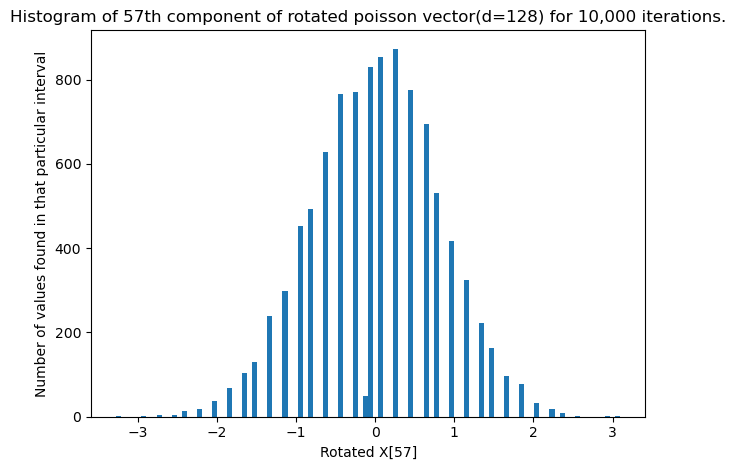

In [8]:
plt.hist(out_poisson, bins=100)
plt.title("Histogram of 57th component of rotated poisson vector(d=128) for 10,000 iterations.")
plt.xlabel("Rotated X[57]")
plt.ylabel("Number of values found in that particular interval")
plt.tight_layout()
plt.show()